# Programming Exercise 2: Logistic Regression

Logistic regression is a classification algorithm.


In [55]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
 

Number of samples 100
Number of parameters:  2
y shape (100, 1)


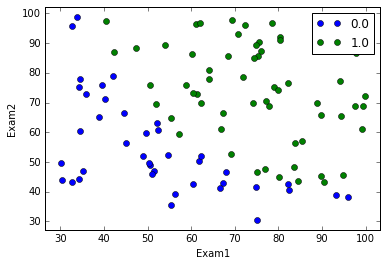

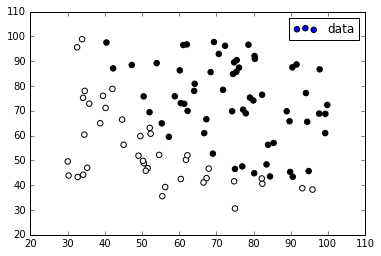

In [74]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

# X represents samples
# y the labels (the classification, supervised)
X = data[:,0:2]
#print('X:', X)
y = data[:, 2:3]
#print('y:', y)
# number of parameters
m,n = X.shape
print('Number of samples', m)
print('Number of parameters: ', n)

print('y shape', y.shape)


df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=data[:,2]))
groups = df.groupby(data[:,2])
#print(list(groups))
plt.margins(0.05)
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()

plt.scatter(data[:,0] ,data[:,1], c=data[:,2], cmap=plt.cm.binary, s=30, label='data')
plt.legend()
plt.show()

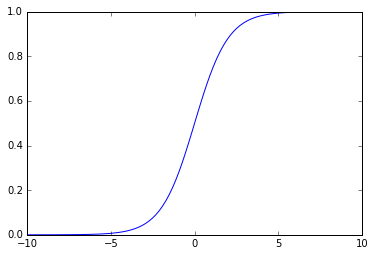

(100, 3)
Theta:  [[ 0.]
 [ 0.]
 [ 0.]]
==== Initial Cost : 0.69314718056
==== Initial Gradient : [[-0.001     ]
 [-0.12009217]
 [-0.11262842]]
Theta:  [[-25.06765322]
 [  0.20548237]
 [  0.2007136 ]]
Cost : 0


(0, 1)

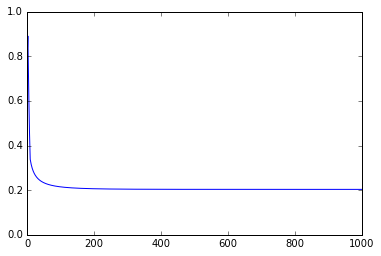

In [75]:
import math
from scipy.special import expit

# Return the sigmoid of a number or a vector
# To optimize on vector, better to use "expit"
def sigmoid(z):
    if (isinstance(z, float) or isinstance(z, int)):
        s = 1 / ( 1 + math.exp(-z))
    else: 
        s = (np.array(list(map(lambda x: sigmoid(x), z))))
    return s


t = np.linspace(-10, 10, 100)
tsigmoid = sigmoid(t)
plt.plot(t, tsigmoid)
plt.show()

# returns Cost and Gradient
def computeCost(theta, X, y):
    # Number of samples (training examples)
    m = y.shape[0]
    #print('y:', y)
    # linear regression with simple least square minimization
    # H = (np.dot(X, theta) - y)
    # J = (np.dot(H.transpose(), H)) / (2*m)
    
    # logistic regression with sigmoid
    H = sigmoid(np.dot(X,theta))
    
    #print('H : ', H)
    #JM = (-y'*log(H) - ( 1 - y')*log(1-H));
    JM = np.array(list(map(lambda x,y : -y*x, map(lambda x: math.log(x), H), y))) - \
         np.array(list(map(lambda x,y : (1-y)*x, map(lambda x: math.log(1-x), H), y)))
    #J = sum(JM)/m;
    J = np.sum(JM) / m
    
    #gradM = (H - y)'*X;
    #grad = gradM/m;
    grad = np.dot( \
                  (np.array(list(map(lambda x,y : x - y, H, y))) / m).transpose(), \
                  X) / m
    grad.shape = ((3,1))
    return J, grad

def gradientDescent(theta, X, y, m, computeCost):
    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    if computeCost:
        J = np.sum(-y*(np.log(H)) - (1-y)*np.log(1-H)) / m
    else:
        J = 0
    
    #grad = np.dot( (np.array(list(map(lambda x,y : x - y, H, y))) / m).transpose(), X) / m
    grad = np.dot( ((H-y) / m).transpose(), X) / m
    grad.shape = ((3,1))
    return J, grad
    
    
# prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
# we have n+1 parameters because of the "dummy parameter"
theta = np.zeros((n+1, 1))

# add this dummy parameter to X
ones = np.ones((m, 1))
X = np.hstack((ones, X))
print(X.shape)

print('Theta: ', theta)
cost, grad = computeCost(theta, X, y)

print('==== Initial Cost :', cost)
print('==== Initial Gradient :', grad)
alpha = 0.15
cost_evolution = []
# Number of samples (training examples)
m = y.shape[0]


for i in range(10000000):
    theta = theta - alpha*grad
    if i%10000 == 0:
        cost, grad = gradientDescent(theta, X, y, m, True)
        cost_evolution.append(cost)
    else:
        cost, grad = gradientDescent(theta, X, y, m, False)
        
print('Theta: ', theta)
print('Cost :', cost)

plt.plot(range(len(cost_evolution)), cost_evolution)
plt.xlim((0,len(cost_evolution)))
plt.ylim((0, 1))



In [8]:
#500000 iterations : 15 minutes on DELL
#1000 iterations : 3 sec on MB
#10000 iterations : 10 sec on MB after 1st optimization
#10000 iterations : 1 sec on MB after expit (sigmoid) optimization
#100000 iterations : 3 sec on MB
#1000000 iterations : 17 sec on MB




In [ ]:
# Solution for Theta after 10M iterations :
# [-25.06765322, 0.20548237, 0.2007136 ]

# Test on a specific value to know wether it is class 0 or class 1
